# ist652 - Scripting for Data Analysis
## Jim Hwang, Woojin Park, Chiau Yin Yang
## Sci-kit Learn (sklearn) Package for NMF Topic Modeling

## 0. Load dataset

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import seaborn as sns

In [2]:
# Load data set (.csv) using pandas
data = pd.read_csv('C:/Users/Jim Hwang/Downloads/a_clean.csv', error_bad_lines=False);

# Articles by 'NPR' are our target to analyze
data_NPR = data.loc[data['publication'] == 'NPR']

# Store only text contents
data_text = data_NPR[['content']]
data_text['index'] = data_text.index

# Assign to 'documents' which has texts and index of each
documents = data_text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [3]:
documents.shape

(2822, 2)

In [4]:
documents.head(5)

,content,index
30904,Donald Trump has used Twitter — his prefe...,30904
30905,"Updated at 2:50 p. m. ET, Russian President Vl...",30905
30906,"If movies were trying to be more realistic, pe...",30906
30907,For the last installment of NPR’s holiday reci...,30907
30908,"David Bowie, Prince and George Michael are all...",30908


## 1. Vectorization

### 1-1. Term-Frequency inverse Document-Frequency (TF-IDF) for Non-negative matrix factorization (NMF)

In [5]:
no_features = 1000000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, max_features=no_features
                                   , stop_words='english', token_pattern = r'\b[^\d\W]+\b')
tfidf = tfidf_vectorizer.fit_transform(documents['content'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

print(len(tfidf_vectorizer.get_feature_names()))
print(tfidf_feature_names[1:10])

13259
['aarti', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abbas', 'abbott', 'abc', 'abdel']


## 2. Model

### 2-1. NMF Topic Modeling

In [16]:
no_topics = 6

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf_z = nmf.fit_transform(tfidf)

## 3. Result

In [22]:
# Function for display results
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Number of top words
no_top_words = 20

### 3-1. NMF Result

In [23]:
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
u, syria, reports, syrian, said, forces, russia, city, government, isis, aleppo, attack, says, military, people, civilians, according, reported, n, state
Topic 1:
trump, president, comey, campaign, said, donald, house, obama, white, election, russia, intelligence, fbi, russian, committee, administration, clinton, investigation, u, presidential
Topic 2:
t, like, think, people, just, know, says, really, music, m, don, ve, going, time, way, kind, things, women, lot, life
Topic 3:
clinton, sanders, voters, percent, cruz, democratic, state, delegates, gop, vote, democrats, party, win, republicans, race, polls, primary, campaign, rubio, candidates
Topic 4:
police, officers, officer, said, attack, shooting, shot, man, suspect, reports, video, department, authorities, killed, protesters, arrested, city, scott, gun, people
Topic 5:
court, law, state, federal, judge, order, supreme, case, justice, circuit, ban, ruling, pipeline, decision, executive, department, reported, roof, attorney,

In [19]:
TopicNumber=[]
for i in range(len(nmf_z)):
    h=nmf_z[i].tolist().index(nmf_z[i].max())
    TopicNumber.append(h)
documents['topic_nmf']=TopicNumber

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


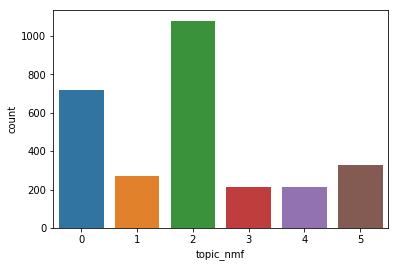

In [21]:
sns.countplot(x='topic_nmf', data=documents)